# Projeto Ordenação
Projeto 1 da disciplina Algoritmos e Programação do curso de pós-graduação em computação aplicada (PPGCA) da Universidade Presbiteriana Mackenzie.

**Aluno:** Fabricio Zillig

---

### Projeto:

Faça um programa (em qualquer linguagem de programação) para:

a) entradas de vetores de tamanhos 1.000, 10.000 e 100.000

- aleatórias

- ordenadas em forma crescente

- ordenadas em forma decrescente

b) utilize os métodos: bolha, bolha otimizado, seleção, inserção, mergesort e quicksort para ordená-los.

c) marque os tempos comparativamente entre todos os métodos em todos os vetores

d) gere um relatório com:

i) método: esclareça, por exemplo, tipo de equipamento utilizado, massa de dados, algoritmos utilizados, linguagem de programação, etc.

ii) gráficos com as comparações de tempos medidos entre todos os métodos.

iii) análise crítica sobre a eficiência dos algoritmos.

iv) análise crítica sobre a análise assintótica X os tempos obtidos.

Obs: deve haver apresentação do projeto em sala, em até 10 min.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the data
#dict_result = pickle.load(open("../data/result_dict.pkl", "rb"))
#df = pl.DataFrame(dict_result)
#df.write_csv("../data/result.csv")

## Introdução

Este projeto tem como objetivo comparar o desempenho de diferentes algoritmos de ordenação em diferentes cenários. Os algoritmos escolhidos para a comparação são:

- Bubble Sort
- Bubble Sort Otimizado
- Selection Sort
- Insertion Sort
- Merge Sort
- Quick Sort

Os cenários, considerando vetores de tamanhos 1.000, 10.000 e 100.000, são:

- Vetor aleatório (Caso médio)
- Vetor ordenado em ordem crescente (Melhor caso)
- Vetor ordenado em ordem decrescente (Pior caso)



## Metodologia

Para a comparação dos algoritmos, foi desenvolvido um programa em Python que gera vetores de tamanhos 1.000, 10.000 e 100.000 com números aleatórios, ordenados em ordem crescente e ordenados em ordem decrescente. Para cada vetor gerado, é feita a ordenação utilizando os algoritmos mencionados anteriormente e é medido o tempo de execução de cada algoritmo.

### Equipamento Utilizado

O programa foi executado em um computador com as seguintes configurações:

- Macbook Pro 2021 com Apple M1 Pro
- 16 GB de memória RAM
- Sonoma 14.6.1
- Python 3.12.5

### Massa de Dados

Foram gerados vetores de tamanhos 1.000, 10.000 e 100.000 com números aleatórios, ordenados em ordem crescente e ordenados em ordem decrescente.

- O vetor aleatório foi gerado com números inteiros aleatórios entre 0 e 100.000.
- O vetor ordenado em ordem crescente foi gerado com números inteiros de 0 a n-1.
- O vetor ordenado em ordem decrescente foi gerado com números inteiros de n-1 a 0.

```python
arr_middle = random.sample(range(0, 100_000), n)
arr_best = list(range(0, n))
arr_worst = list(range(n, 0, -1))
```

### Algoritmos

Os algoritmos utilizados para a ordenação dos vetores foram extraídos do repositório [TheAlgorithms](https://github.com/TheAlgorithms/Python) e da página [Programiz](https://www.programiz.com/dsa/bubble-sort).

Para garantir a precisão do teste algumas medidas foram tomadas:

- O tempo de execução foi medido utilizando a biblioteca `time` do Python em milissegundos.
- Cada algoritmo foi executado 5 vezes para cada vetor e o tempo de execução considerado foi a média dos 5 testes.
- O vetor foi copiado antes de ser ordenado para garantir que o vetor original não fosse alterado.
- O tempo de execução foi calculado usando o tempo no início e no final da execução do algoritmo. Outras operações, como a geração do vetor, salvamento dos resultados entre outros, não foram consideradas no cálculo do tempo de execução.


O código fonte do programa está disponível no repositório do GitHub: []()

## Resultados

Os resultados obtidos estão em um dicionário serializado em um arquivo pickel.

- Tabela descritiva dos tempos
- Gráficos comparativos dos tempos 
    - Gráfico de barras para cada algoritmo
    - Gráfico de barra comparativo entre os algoritmos

```python
Fim! Tempo total: 530.98min
```

In [2]:
df = pl.read_csv('../data/result.csv')
df.sample(5)

len_arr,iteration,alg,best,middle,worst
i64,i64,str,f64,f64,f64
100000,4,"""quick_sort""",1121.8821,1046.074,1114.7451
1000,3,"""selection_sort""",11.4102,11.7722,12.3228
1000,0,"""quick_sort""",11.5249,10.3049,11.0979
1000,2,"""optimized_bubble_sort""",0.0378,26.4458,32.282
10000,3,"""quick_sort""",110.6411,103.4583,111.9041


In [132]:
nome_algoritmos = {
    "bubble_sort": "1. Bubble Sort",
    "optimized_bubble_sort": "2. Optimized Bubble Sort",
    "insertion_sort": "3. Insertion Sort",
    "selection_sort": "4. Selection Sort",
    "merge_sort": "6. Merge Sort",
    "quick_sort": "5. Quick Sort",
}

In [134]:
with pl.Config(
    float_precision=2,
    thousands_separator=".",
    decimal_separator=",",
    set_tbl_column_data_type_inline = True
):
    print(
        df.select(
            pl.col("best").alias("Melhor Caso"),
            pl.col("middle").alias("Caso Médio"),
            pl.col("worst").alias("Pior Caso"),
        ).describe()
    )


shape: (9, 4)
┌─────────────────┬───────────────────┬──────────────────┬─────────────────┐
│ statistic (str) ┆ Melhor Caso (f64) ┆ Caso Médio (f64) ┆ Pior Caso (f64) │
╞═════════════════╪═══════════════════╪══════════════════╪═════════════════╡
│ count           ┆ 90,00             ┆ 90,00            ┆ 90,00           │
│ null_count      ┆ 0,00              ┆ 0,00             ┆ 0,00            │
│ mean            ┆ 34.178,05         ┆ 120.400,12       ┆ 199.403,47      │
│ std             ┆ 135.712,91        ┆ 315.340,94       ┆ 547.329,57      │
│ min             ┆ 0,04              ┆ 2,23             ┆ 2,05            │
│ 25%             ┆ 2,06              ┆ 25,82            ┆ 24,31           │
│ 50%             ┆ 13,58             ┆ 1.044,86         ┆ 1.113,77        │
│ 75%             ┆ 1.118,94          ┆ 3.006,05         ┆ 3.863,31        │
│ max             ┆ 1.111.469,95      ┆ 1.399.610,91     ┆ 3.397.482,11    │
└─────────────────┴───────────────────┴──────────────────┴────

In [137]:
df_aux = (
    df.with_columns(pl.col("alg").replace(nome_algoritmos))
    .group_by(["len_arr", "alg"])
    .agg(pl.mean(["best", "middle", "worst"]))
    .select(
        pl.col("best").alias("Melhor Caso"),
        pl.col("middle").alias("Caso Médio"),
        pl.col("worst").alias("Pior Caso"),
    )
    .sort("alg")
)
with pl.Config(
    float_precision=2,
    thousands_separator=".",
    decimal_separator=",",
    set_tbl_column_data_type_inline = True
):
    print('Array 1000 elements')
    print(df_aux.filter(pl.col('len_arr') == 1000).select(pl.all().exclude("len_arr")))
    print('Array 10000 elements')
    print(df_aux.filter(pl.col("len_arr") == 10000).select(pl.all().exclude("len_arr")))
    print('Array 100000 elements')
    print(
        df_aux.filter(pl.col("len_arr") == 100000).select(pl.all().exclude("len_arr"))
    )

Array 1000 elements
shape: (6, 4)
┌──────────────────────────┬────────────┬──────────────┬─────────────┐
│ alg (str)                ┆ best (f64) ┆ middle (f64) ┆ worst (f64) │
╞══════════════════════════╪════════════╪══════════════╪═════════════╡
│ 1. Bubble Sort           ┆ 13,69      ┆ 25,81        ┆ 31,18       │
│ 2. Optimized Bubble Sort ┆ 0,04       ┆ 26,78        ┆ 32,38       │
│ 3. Insertion Sort        ┆ 0,05       ┆ 13,22        ┆ 24,24       │
│ 4. Selection Sort        ┆ 11,33      ┆ 11,87        ┆ 12,29       │
│ 5. Quick Sort            ┆ 11,27      ┆ 10,39        ┆ 11,10       │
│ 6. Merge Sort            ┆ 2,08       ┆ 2,29         ┆ 2,11        │
└──────────────────────────┴────────────┴──────────────┴─────────────┘
Array 10000 elements
shape: (6, 4)
┌──────────────────────────┬────────────┬──────────────┬─────────────┐
│ alg (str)                ┆ best (f64) ┆ middle (f64) ┆ worst (f64) │
╞══════════════════════════╪════════════╪══════════════╪═════════════╡
│ 1. Bub

In [104]:
def generate_heatmap(df, title, len=1000):

    df_aux = (
        (
            df.filter(pl.col("len_arr") == len)
            .group_by(["alg"])
            .agg(
                pl.mean("best").alias("Melhor Caso"),
                pl.mean("middle").alias("Caso Médio"),
                pl.mean("worst").alias("Pior Caso"),
            )
            .with_columns(pl.col("alg").replace(nome_algoritmos))
            .sort("alg")
        )
        .to_pandas()
        .set_index("alg")
    )

    mean = df_aux.mean()
    std = df_aux.std()

    #normalizando
    df_norm_col = (df_aux - mean) / std

    # Criando o heatmap
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        df_norm_col,
        annot=True,
        linewidths=0.5,
        fmt=".2f",
        cmap="bwr",
        cbar_kws={"label": "Tempo Normalizado"},
        annot_kws={'size': 16},
        vmax= 1.5,
        vmin= -1.5,
        center=0
    )

    # Personalizando o gráfico
    plt.title(f"{title}", fontsize=16)
    plt.xlabel("Caso", fontsize=12)
    plt.ylabel("Algoritmos", fontsize=12)

    # Ajustando o layout
    plt.tight_layout()

    # Exibindo o gráfico
    return plt.show()


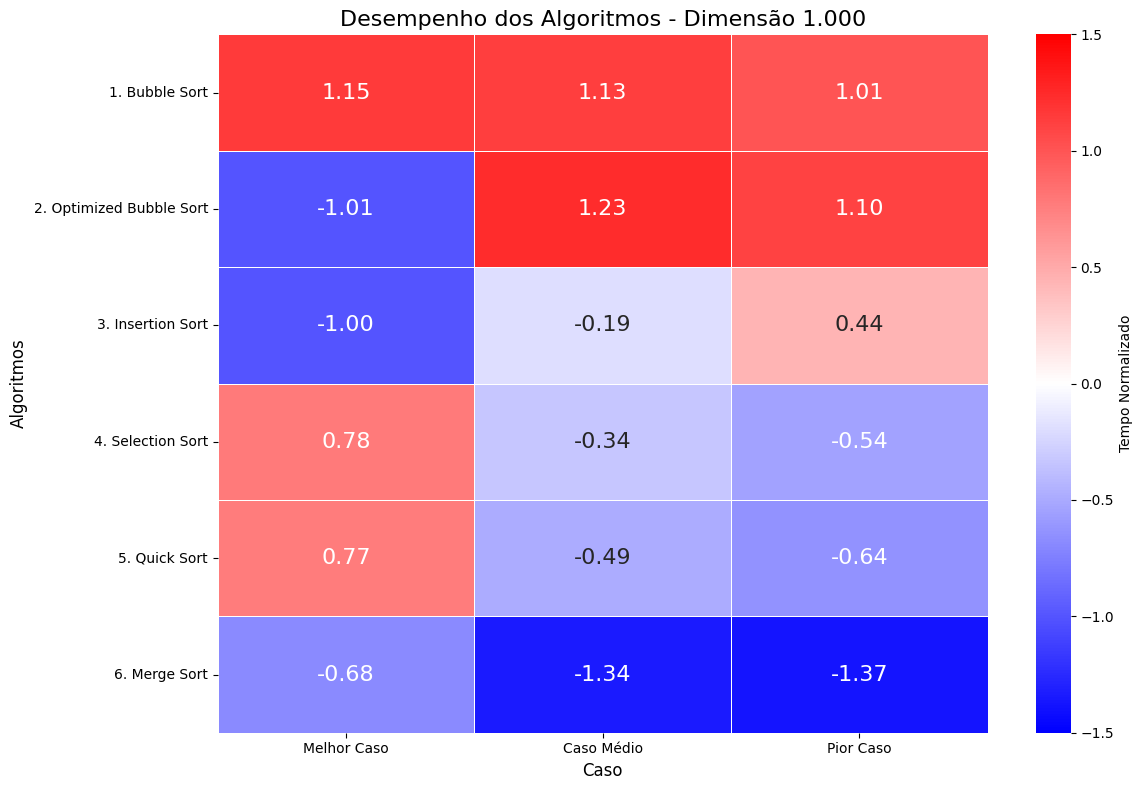

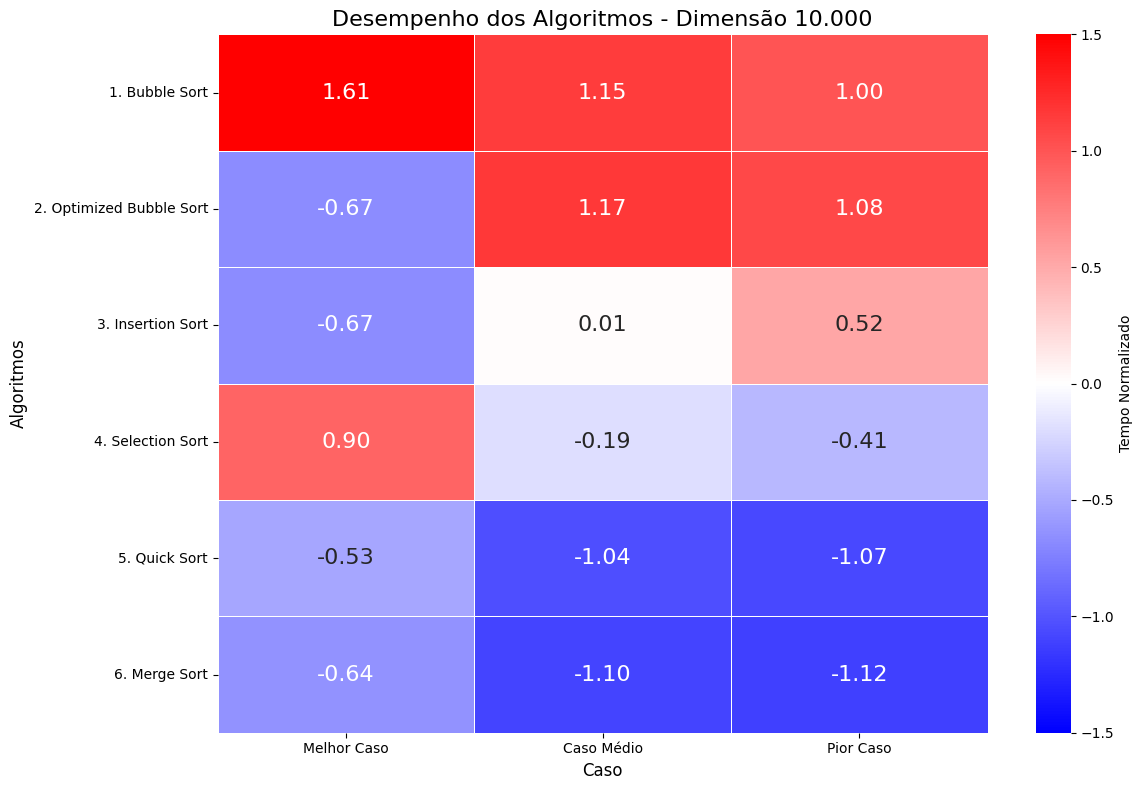

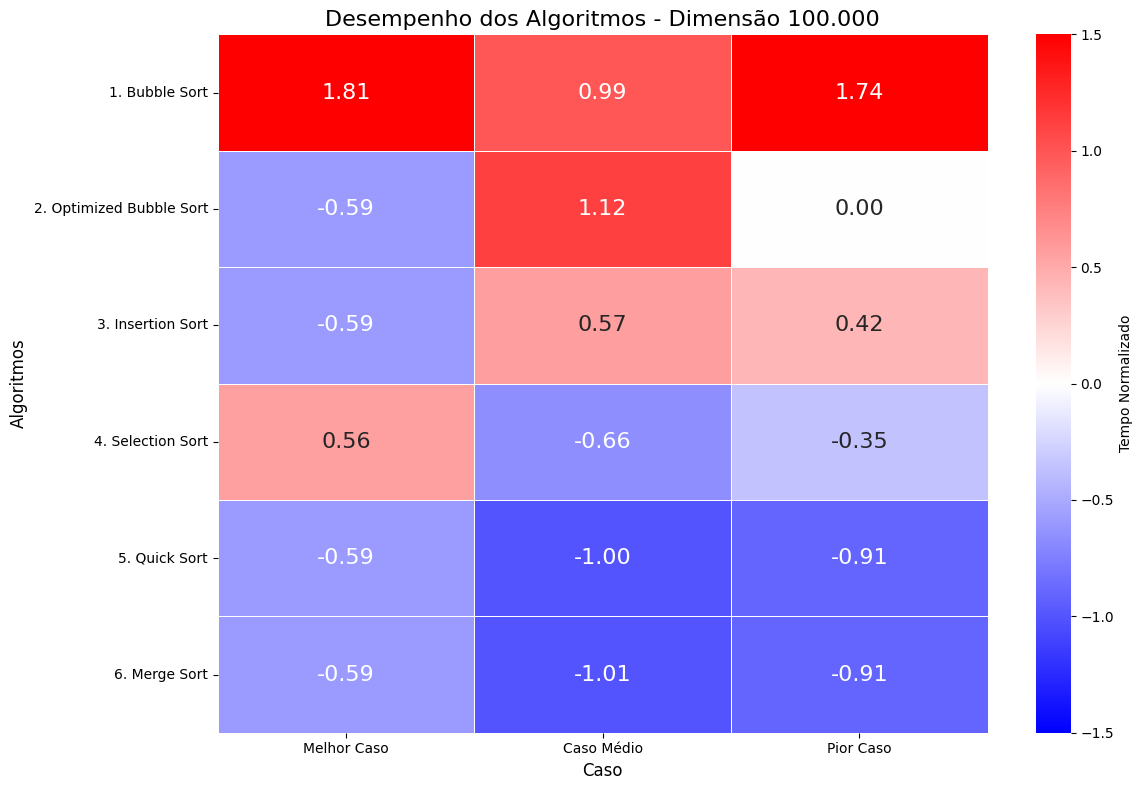

In [105]:
generate_heatmap(df, "Desempenho dos Algoritmos - Dimensão 1.000", 1000)
generate_heatmap(df, "Desempenho dos Algoritmos - Dimensão 10.000", 10000)
generate_heatmap(df, "Desempenho dos Algoritmos - Dimensão 100.000", 100000)

In [116]:
def generate_barplot(df, title, len=1000):

    df_aux = (
        df.filter(pl.col("len_arr") == len)
        .group_by(["len_arr", "alg"])
        .agg(
            pl.mean("best").alias("Melhor Caso"),
            pl.mean("middle").alias("Caso Médio"),
            pl.mean("worst").alias("Pior Caso"),
        )
        .with_columns(pl.col("alg").replace(nome_algoritmos))
        .unpivot(index=["len_arr", "alg"], variable_name="type", value_name="time")
        .sort("alg")
    )

    colors = ["#6464FF", "#FFD441", "#FF3F40"]

    plt.figure(figsize=(15, 6))
    ax = sns.barplot(
        data=df_aux,
        x="alg",
        y="time",
        hue="type",
        palette=colors,
    )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Personalizando o gráfico
    plt.title(f"{title}", fontsize=16)
    plt.xlabel("Algoritmo", fontsize=12)
    plt.ylabel("Tempo Médio (Milissegundos)", fontsize=12)
    plt.xticks(rotation=0, ha="center")
    plt.legend(title="Performance", title_fontsize="12", fontsize="10")

    # Ajustando o layout
    plt.tight_layout()
    plt.yscale("log")

    for spine in ["bottom", "left"]:
        ax.spines[spine].set_color("#666")
        ax.spines[spine].set_linewidth(0.5)

    # Ajustando a cor dos ticks
    ax.tick_params(axis="x", colors="#666")
    ax.tick_params(axis="y", colors="#666")

    # Ajustando a legenda
    plt.legend(
        title="Caso do Conjunto",
        title_fontsize="12",
        fontsize="10",
        loc="upper left",  # Posição da legenda
        bbox_to_anchor=(1, 1),  # Âncora da legenda
        frameon=False,
    )


    return plt.show()


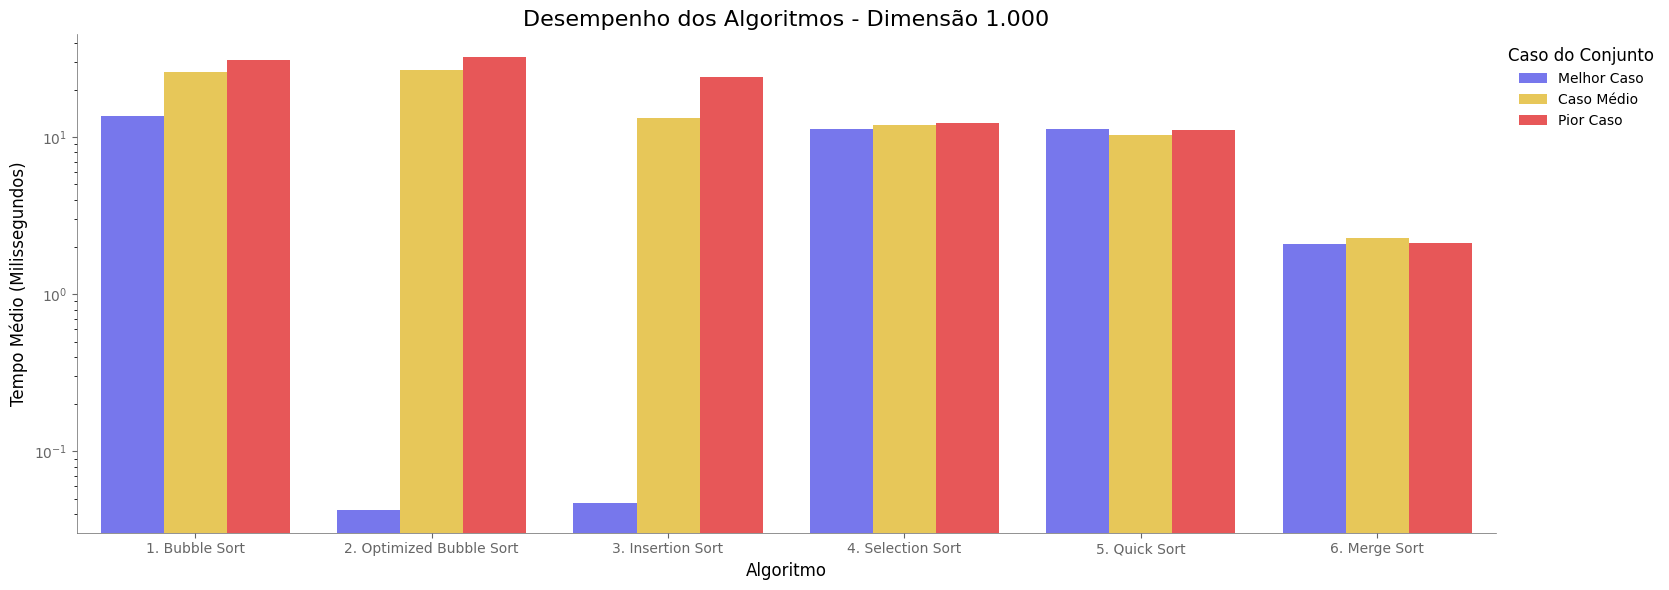

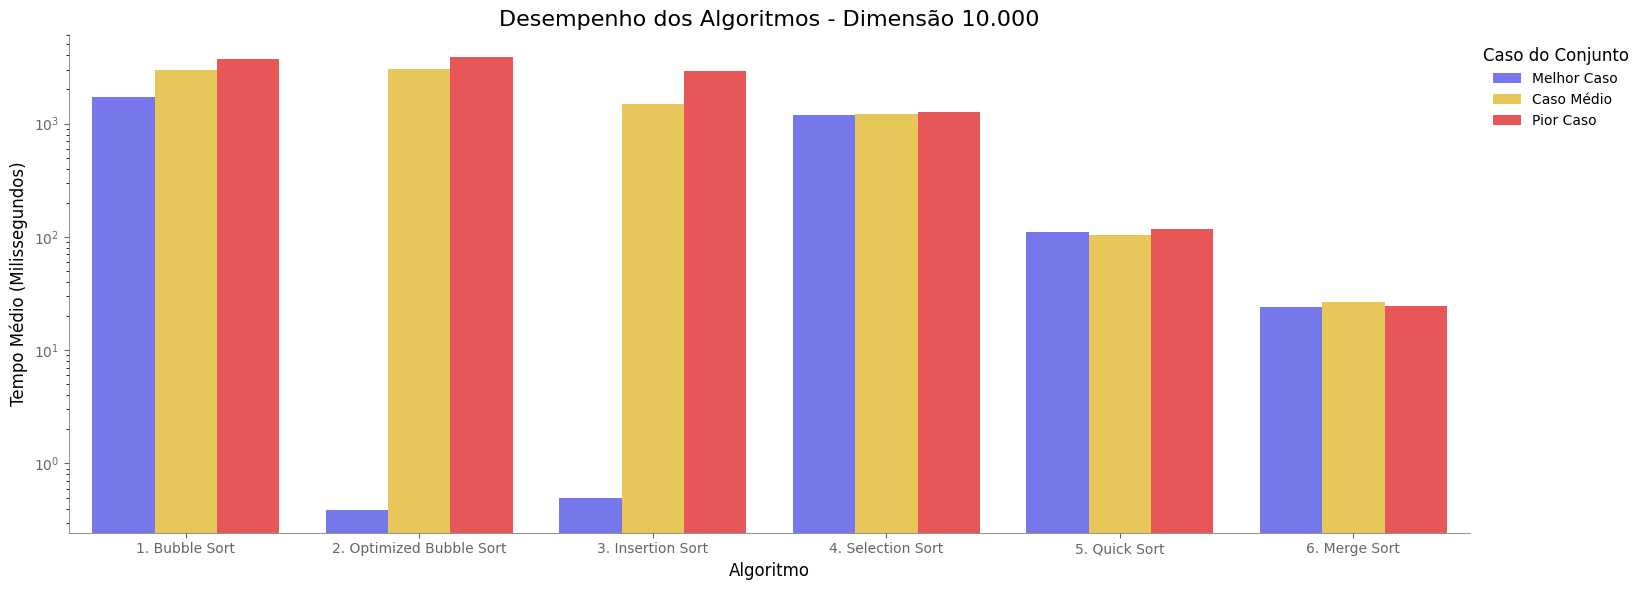

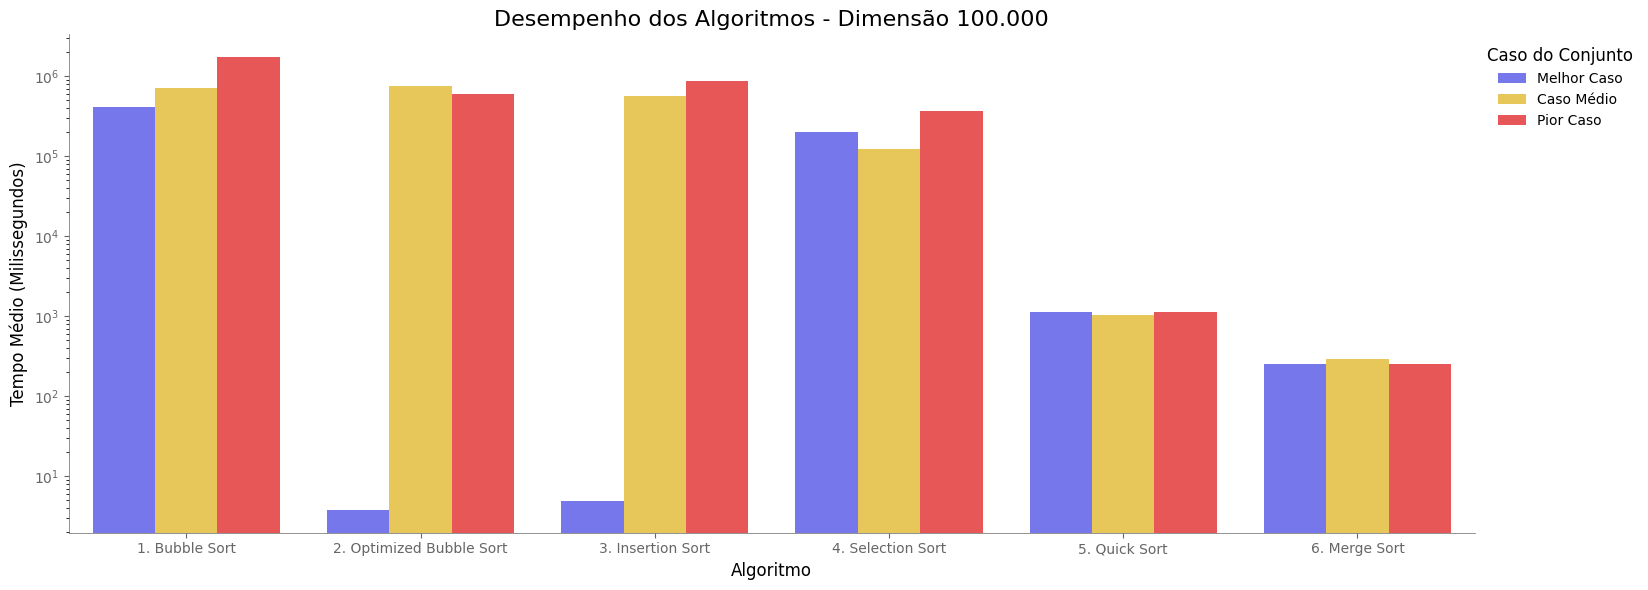

In [118]:
generate_barplot(df, "Desempenho dos Algoritmos - Dimensão 1.000", 1000)
generate_barplot(df, "Desempenho dos Algoritmos - Dimensão 10.000", 10000)
generate_barplot(df, "Desempenho dos Algoritmos - Dimensão 100.000", 100000)

In [129]:
def generate_boxplot(df, title, len=1000):

    df_aux = (
        df.filter(pl.col("len_arr") == len)
        .select(
            pl.all().exclude(["best", "middle", "worst"]),
            pl.col("best").alias("Melhor Caso"),
            pl.col("middle").alias("Caso Médio"),
            pl.col("worst").alias("Pior Caso"),
        )
        .with_columns(pl.col("alg").replace(nome_algoritmos))
        .unpivot(
            index=["len_arr", "alg", "iteration"],
            variable_name="type",
            value_name="time",
        )
        .sort("alg")
    )
    colors = ["#6464FF", "#FFD441", "#FF3F40"]

    plt.figure(figsize=(15, 6))
    ax = sns.boxplot(data=df_aux, x="alg", y="time", hue="type", palette=colors)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Personalizando o gráfico
    plt.title(f"{title}", fontsize=16)
    plt.xlabel("Algoritmo", fontsize=12)
    plt.ylabel("Tempo (Milissegundos)", fontsize=12)
    plt.xticks(rotation=0, ha="center")
    plt.legend(title="Performance", title_fontsize="12", fontsize="10")

    # Ajustando o layout
    plt.tight_layout()
    #plt.yscale("log")

    for spine in ["bottom", "left"]:
        ax.spines[spine].set_color("#666")
        ax.spines[spine].set_linewidth(0.5)

    # Ajustando a cor dos ticks
    ax.tick_params(axis="x", colors="#666")
    ax.tick_params(axis="y", colors="#666")

    # Ajustando a legenda
    plt.legend(
        title="Caso do Conjunto",
        title_fontsize="12",
        fontsize="10",
        loc="upper left",  # Posição da legenda
        bbox_to_anchor=(1, 1),  # Âncora da legenda
        frameon=False,
    )

    return plt.show()

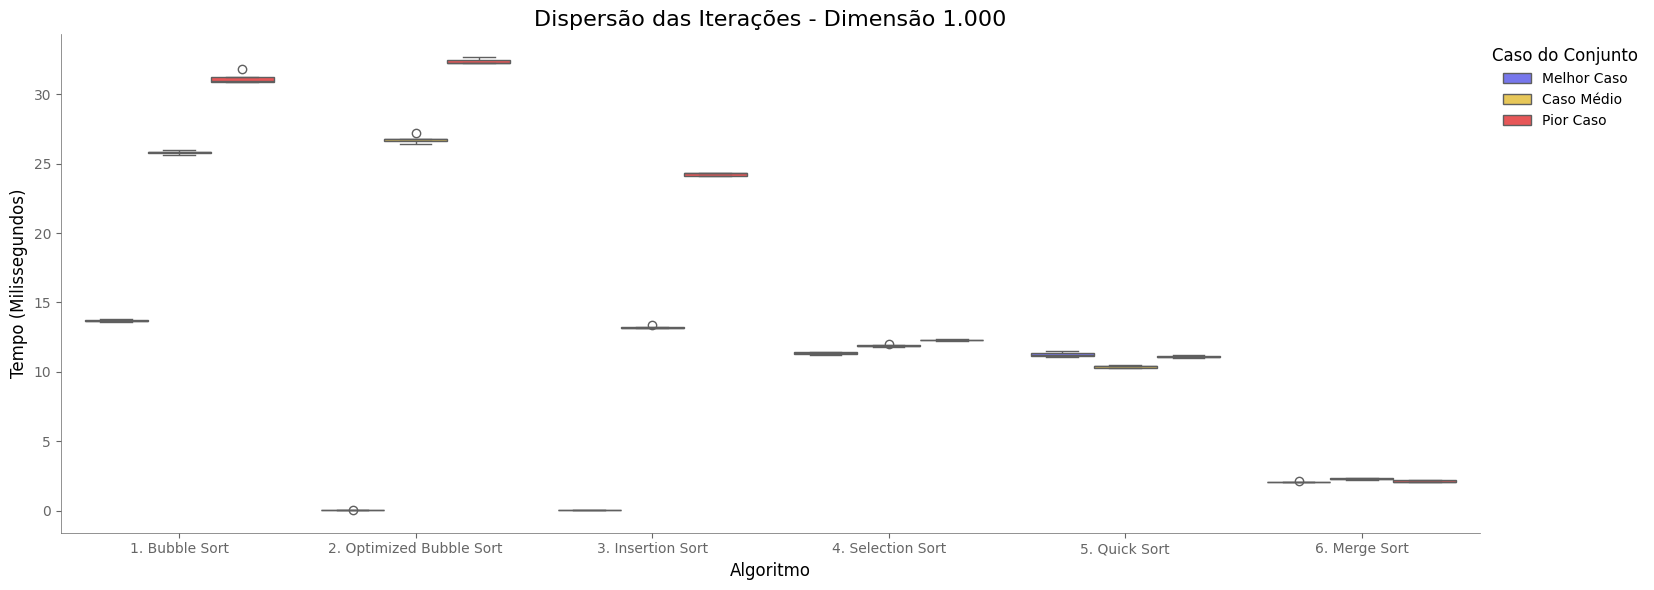

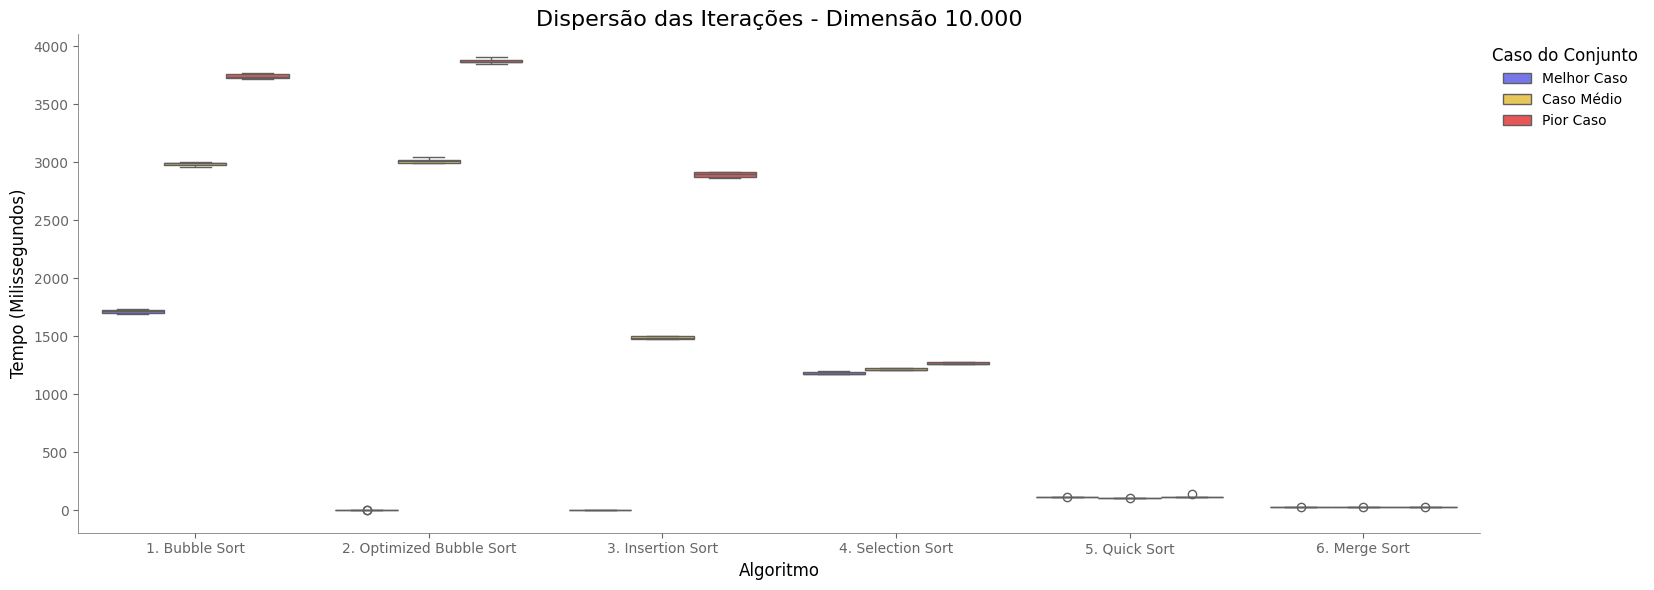

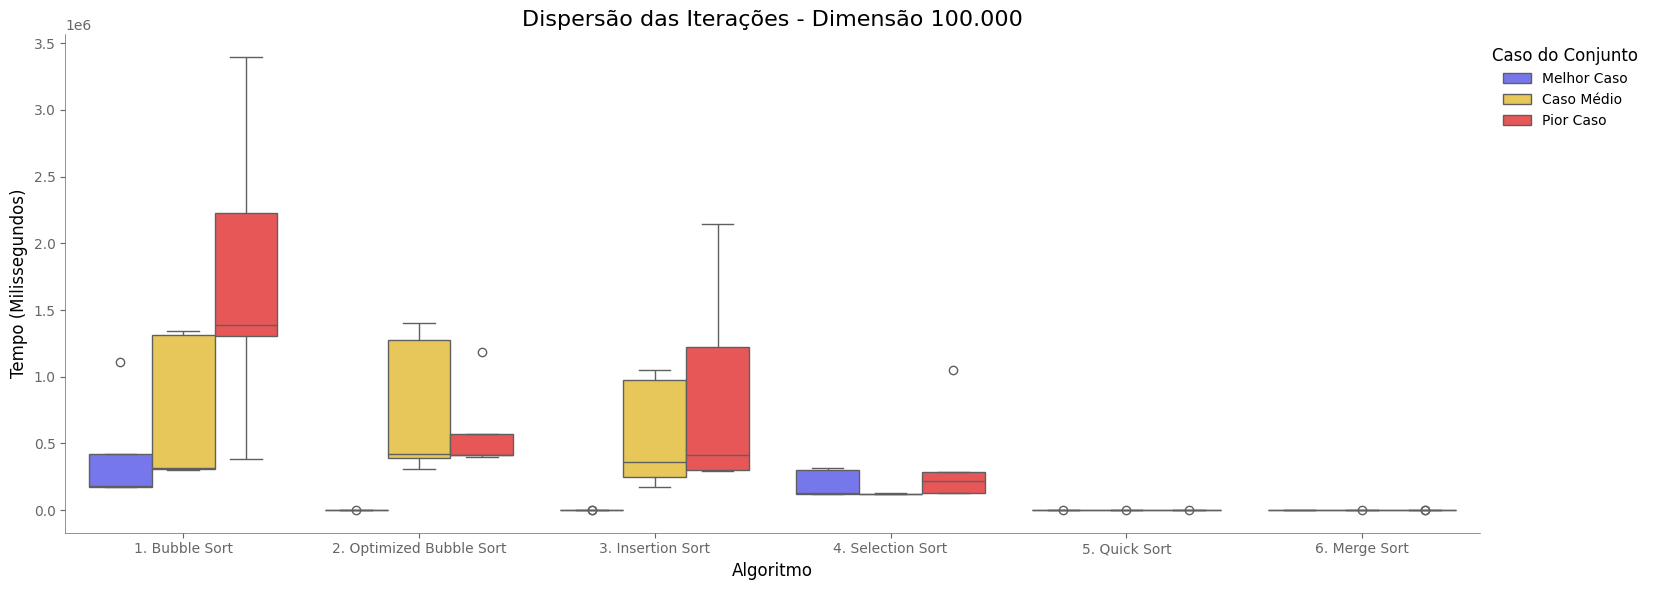

In [130]:
generate_boxplot(df, "Dispersão das Iterações - Dimensão 1.000", 1000)
generate_boxplot(df, "Dispersão das Iterações - Dimensão 10.000", 10000)
generate_boxplot(df, "Dispersão das Iterações - Dimensão 100.000", 100000)

## Conclusão